# Проект по статистическому анализу данных  
## Статистический анализ данных и проверка гипотез по данным сервиса аренды самокатов GoFast

* В этом проекте рассмотрим несколько наборов данных сервиса аренды самокатов GoFast. В нашем распоряжении данные о пользователях, о поездках и о наличии или отсутствии платной подписки на сервис.
* Нашей целью проекта является структурирование полученных данных, поиск и решение имеющихся в них проблем (выбросы в данных, пропуски и т.д.). Рассмотрим влияних некоторых параметров на прибыль сервиса, а также проведем статистические тесты проверки сформулированных гипотез.
* Мы получили три таблицы в формате .csv с данными о пользователях сервиса (идентификатор, имя, возраст, город, тип подписки), данные о поездках (идентификатор пользователя выполнявшего поездку, расстояние поездки, продолжительность, дата), информациюю о наличии подписки у пользователя (тип подписки, стоимость минуты поездки, стоимость старта, стоимость ежемесячного платежа)
* План данной работы включает в себя: загрузку данных, предобработку, исследовательский анализ данных, объединение полученных таблиц в единый датасет, подсчёт выручки сервиса по данным, проверка гипотез, рассмотрение распределений по набору данных.


#### Шаг 1. Загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from scipy.stats import binom, norm 
from math import factorial, sqrt

In [2]:
try:
    data_users = pd.read_csv('C:/Users/kiselevvs/Desktop/Data analyst/datasets/users_go.csv')
    data_rides = pd.read_csv('C:/Users/kiselevvs/Desktop/Data analyst/datasets/rides_go.csv')
    data_subs = pd.read_csv('C:/Users/kiselevvs/Desktop/Data analyst/datasets/subscriptions_go.csv')
except:
    data_users = pd.read_csv('https://')
    data_rides = pd.read_csv('https://')
    data_subs = pd.read_csv('https://')
        

Далее вывожу на экран первые строчки по датафреймам и смотрю общую информацию о данных

In [3]:
print(data_rides.head())
print()
print(data_rides.info())

   user_id     distance   duration        date
0        1  4409.919140  25.599769  2021-01-01
1        1  2617.592153  15.816871  2021-01-18
2        1   754.159807   6.232113  2021-04-20
3        1  2694.783254  18.511000  2021-08-11
4        1  4028.687306  26.265803  2021-08-28

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB
None


В датасете хранится информация о поездках, содержит 18068 строк с данными числовыми и дата в формате строки  
Формат даты определен как object, стоит перевести в формат pandas dtime

In [4]:
print(data_subs.head())
print()
print(data_subs.info())

  subscription_type  minute_price  start_ride_price  subscription_fee
0              free             8                50                 0
1             ultra             6                 0               199

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes
None


В датасете хранится информация об условиях подписки, всего 2 строки с 2 вариантами 

In [5]:
print(data_users.head())
print()
print(data_users.info())

   user_id        name  age            city subscription_type
0        1        Кира   22          Тюмень             ultra
1        2   Станислав   31            Омск             ultra
2        3     Алексей   20          Москва             ultra
3        4  Константин   26  Ростов-на-Дону             ultra
4        5       Адель   28            Омск             ultra

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
None


В датасете с информацией о пользователях сервиса 1565 строк с данными, типы данных числовые и строки с текстом

#### Шаг 2. Предобработка данных

In [6]:
data_rides['date'] = pd.to_datetime(data_rides['date'], format='%Y-%m-%d' )

In [7]:
data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


В датасете с информацией о поездках 18068 строк с данными, типы данных числовые и текстовые с датой

перевел столбец **data_rides['date']** в формат даты пандас

In [8]:
data_rides['date'].sort_values()

0       2021-01-01
13113   2021-01-01
5445    2021-01-01
12775   2021-01-01
17096   2021-01-01
           ...    
15325   2021-12-30
7541    2021-12-30
6115    2021-12-30
10991   2021-12-30
11778   2021-12-30
Name: date, Length: 18068, dtype: datetime64[ns]

Выполнил сортировку стольца с датами. Посмтрел за какой период предоставлены данные, все данные за 2021 год

In [9]:
data_rides['date_month'] = data_rides['date'].dt.month

In [10]:
data_rides

,user_id,distance,duration,date,date_month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8
...,...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04,11
18064,1534,2840.423057,21.409799,2021-11-16,11
18065,1534,3826.185507,18.435051,2021-11-18,11
18066,1534,2902.308661,16.674362,2021-11-27,11


Создал новый столбец с номером месяца поездки

Пропущенных значений в датафреймах в первой части работы на основании метода .info() не выявлено, проверим на наличие полных дубликатов

In [11]:
print(data_rides.duplicated().sum())
print(data_subs.duplicated().sum())
print(data_users.duplicated().sum())

0
0
31


In [12]:
data_users = data_users.drop_duplicates()

In [13]:
print(data_users.duplicated().sum())

0


Избавились от явных дубликатов в датафрейме с данными о пользователях

#### Шаг 3. Исследовательский анализ данных

In [14]:
data_users['city'].value_counts()

city
Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: count, dtype: int64

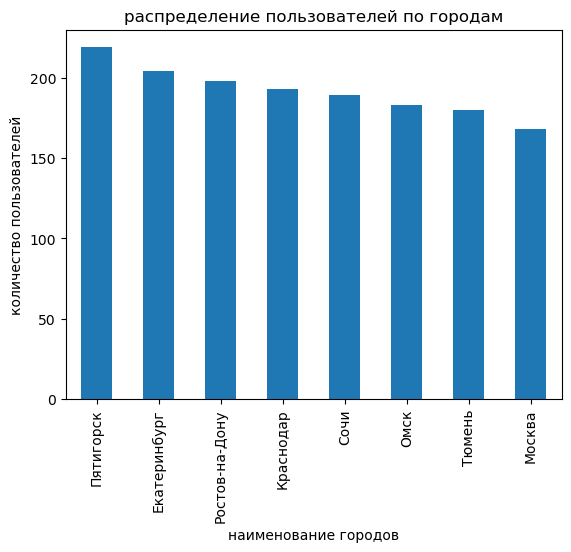

In [15]:
data_users['city'].value_counts().plot(kind='bar')
plt.title('распределение пользователей по городам');
plt.xlabel('наименование городов');
plt.ylabel('количество пользователей');

Вывел количество пользователей по городам в порядке убывания, а также визуализировал данные столбчатой диаграммой

In [16]:
data_users['subscription_type'].value_counts()

subscription_type
free     835
ultra    699
Name: count, dtype: int64

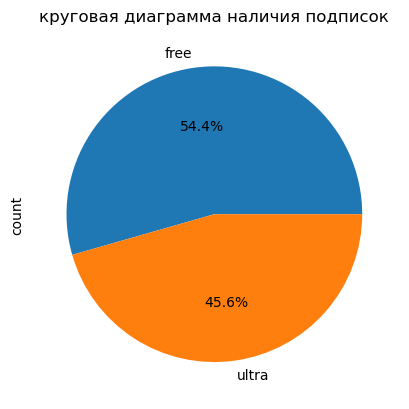

In [17]:
data_users['subscription_type'].value_counts().plot(kind='pie', autopct='%1.1f%%');
plt.title('круговая диаграмма наличия подписок');

Отобразил количество пользователей с подпиской и без, и отобразил данные на круговой диаграмме с процентным соотношением пользователей  
Пользователей без подписки чуть больше - 54.4 %

In [18]:
data_users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

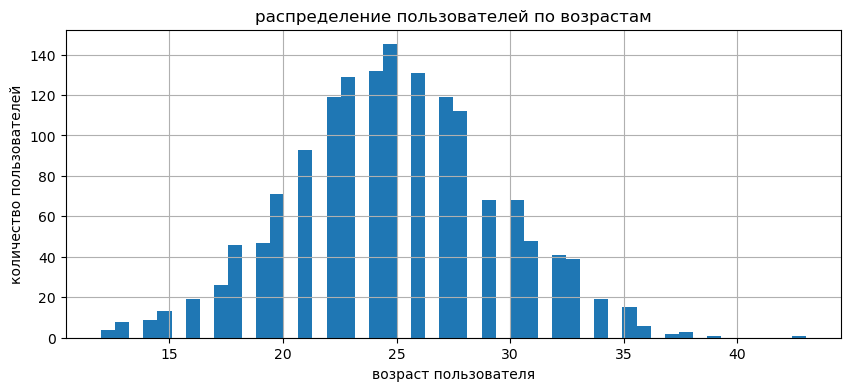

In [19]:
data_users['age'].hist(figsize=(10,4), bins=50);
plt.title('распределение пользователей по возрастам');
plt.xlabel('возраст пользователя');
plt.ylabel('количество пользователей');

На гистограмме отобразил данные о возрасте пользователей. Гистограмма отображает нормальное распределение без явных выбросов и/или проблем в данных.  
Медиана и среднее значение = 25 лет. первый квартиль (25%) равняется 22 года, третий квартиль(75 %) 28 лет. 

In [20]:
data_rides['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

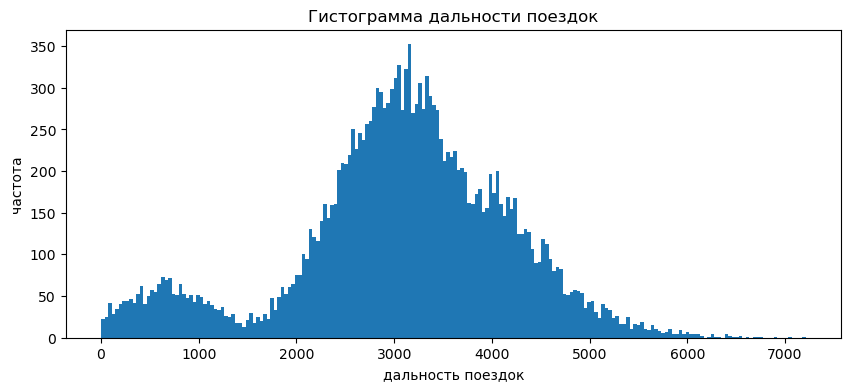

In [21]:
data_rides['distance'].plot(
    kind='hist',
    figsize=(10,4),
    bins=200,
    title='Гистограмма дальности поездок',
    xlabel='дальность поездок',
    ylabel='частота'
);

На гистограмме отобразил данные о дальности поездок. Гистограмма отображает нормальное распределение есть небольшой всплеск данных слева. Данный всплекс можно объяснить первыми поездками от новых пользователей, пользователю могло не понравиться/не удобно/ не получается безопасно управлять самокатом изза этого можем наблюдать этот всплеск в данных в районе 0-1500 м. 
Медиана равна 3133 м, среднее значение = 3070 м., первый квартиль (25%) равняется 2543 м, третий квартиль(75 %) 3776 м. 

In [22]:
data_rides['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

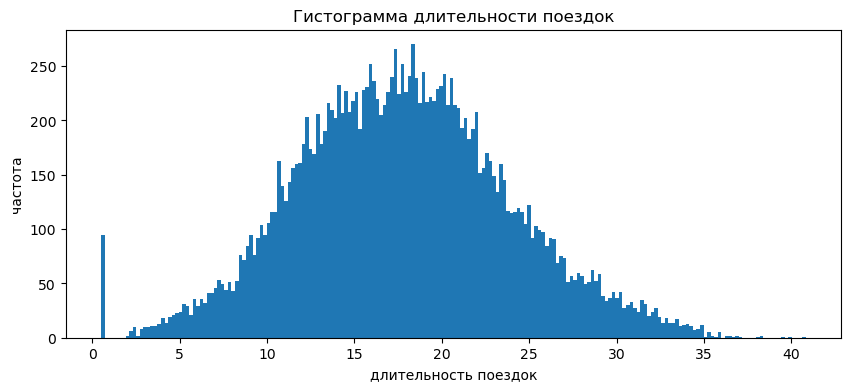

In [23]:
data_rides['duration'].plot(
    kind='hist',
    figsize=(10,4),
    bins=200,
    title='Гистограмма длительности поездок',
    xlabel='длительность поездок',
    ylabel='частота'
);

Видим нормальное распределение с истинным средним  μ около 18 минут, также заметны "выбросы" с значением 2 минуты, которые означают процент поездок, которые начинали и по каким либо причинам решали закончить.  
Среднее значение и медиана равны 17 минутам, первый квартиль (25%) равняется 14 мин, третий квартиль(75 %) 22 мин. 

In [24]:
data_rides.query('duration < 2').sort_values(by='duration')

,user_id,distance,duration,date,date_month
6531,701,4196.445201,0.5,2021-08-31,8
14615,1287,5944.789947,0.5,2021-12-09,12
14574,1285,6316.574814,0.5,2021-09-25,9
14417,1273,4178.876258,0.5,2021-04-30,4
14342,1268,4177.139336,0.5,2021-06-09,6
...,...,...,...,...,...
9581,928,4857.412920,0.5,2021-06-06,6
9497,922,4620.899239,0.5,2021-01-05,1
9282,907,4520.123807,0.5,2021-04-24,4
10426,987,5375.139265,0.5,2021-03-16,3


In [25]:
data_rides.query('duration < 3').sort_values(by='duration')

,user_id,distance,duration,date,date_month
6531,701,4196.445201,0.500000,2021-08-31,8
14574,1285,6316.574814,0.500000,2021-09-25,9
14417,1273,4178.876258,0.500000,2021-04-30,4
14342,1268,4177.139336,0.500000,2021-06-09,6
14178,1257,6120.067697,0.500000,2021-03-16,3
...,...,...,...,...,...
12527,1141,200.034777,2.923237,2021-08-22,8
16553,1426,435.655865,2.933548,2021-01-18,1
16596,1428,251.247681,2.942179,2021-11-18,11
15512,1356,181.295471,2.988884,2021-02-24,2


In [26]:
data_rides.query('duration < 2')['distance'].sort_values()

15132    4030.308008
17909    4103.998874
10692    4106.278268
9698     4169.066800
14342    4177.139336
            ...     
14574    6316.574814
13701    6414.516026
11385    6601.197575
17242    6724.932981
16309    7211.007745
Name: distance, Length: 95, dtype: float64

Судя по данным можем с уверенностью сказать, что левый всплеск на гистограмме по длительности поездок содержит "выбросы" в данных в значениях длительности поездок. Выше провел анализ дальности поездок  аномально малым временем, что подтверждает, что за это время <2 минут проехать более 4 км на самокате не возможно, данные длительности поездок менее 2 м содержат аномалии. **Нужно передать эту информацию инженерам, ответственным за выгрузку данных**

#### Шаг 4. Объединение данных

Объединим три датафрейма в один, в двух из них есть общая колонка с id пользователя, в третьем есть пересекающиеся данные о типе подписки.  
Объединение произведу методом .merge

In [27]:
data_general = data_rides.merge(right=data_users, how='left', on='user_id')\
    .merge(right=data_subs, how='left', on='subscription_type')
data_general

,user_id,distance,duration,date,date_month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04,11,Альберт,25,Краснодар,free,8,50,0
18064,1534,2840.423057,21.409799,2021-11-16,11,Альберт,25,Краснодар,free,8,50,0
18065,1534,3826.185507,18.435051,2021-11-18,11,Альберт,25,Краснодар,free,8,50,0
18066,1534,2902.308661,16.674362,2021-11-27,11,Альберт,25,Краснодар,free,8,50,0


In [28]:
data_general.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   distance           18068 non-null  float64       
 2   duration           18068 non-null  float64       
 3   date               18068 non-null  datetime64[ns]
 4   date_month         18068 non-null  int32         
 5   name               18068 non-null  object        
 6   age                18068 non-null  int64         
 7   city               18068 non-null  object        
 8   subscription_type  18068 non-null  object        
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(5), object(3)
memory usage: 1.6+ MB


In [29]:
data_general.duplicated().sum()

0

Проверка данных после объединения датафреймов. Количество строк (18068) совпадает с количеством строк изначальной таблицы с данными о поездках. Пропусков и дупликатов в данных нет.

Объединение трех датафреймов по колонкам user_id и subscription_type прошло корректно, тип объединения left к дата фрейму с информацией о поездках, содержащем наибольшее количество строк и несколько строк с одним user_id  
в итоге получили единую таблицу с данными о соверешенных поездках, информацией о пользователе и тип подписки

In [30]:
data_general.groupby(by='subscription_type').count()

,user_id,distance,duration,date,date_month,name,age,city,minute_price,start_ride_price,subscription_fee
subscription_type,,,,,,,,,,,
free,11568,11568,11568,11568,11568,11568,11568,11568,11568,11568,11568
ultra,6500,6500,6500,6500,6500,6500,6500,6500,6500,6500,6500


По этим данным видно, что поездок, пользователями с подпиской free совершено почти в 2 раза больше, чем без подписки

In [31]:
data_general_without_subs = data_general.query('subscription_type != "ultra"')
data_general_without_subs

,user_id,distance,duration,date,date_month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
6500,700,2515.690719,14.944286,2021-01-02,1,Айдар,22,Омск,free,8,50,0
6501,700,846.932642,16.234663,2021-02-01,2,Айдар,22,Омск,free,8,50,0
6502,700,4004.434142,20.016628,2021-02-04,2,Айдар,22,Омск,free,8,50,0
6503,700,1205.911290,9.782872,2021-02-10,2,Айдар,22,Омск,free,8,50,0
6504,700,3047.379435,17.427673,2021-02-14,2,Айдар,22,Омск,free,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04,11,Альберт,25,Краснодар,free,8,50,0
18064,1534,2840.423057,21.409799,2021-11-16,11,Альберт,25,Краснодар,free,8,50,0
18065,1534,3826.185507,18.435051,2021-11-18,11,Альберт,25,Краснодар,free,8,50,0
18066,1534,2902.308661,16.674362,2021-11-27,11,Альберт,25,Краснодар,free,8,50,0


In [32]:
data_general_with_subs = data_general.query('subscription_type == "ultra"')
data_general_with_subs

,user_id,distance,duration,date,date_month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,3973.046497,24.671163,2021-08-29,8,Оксана,22,Москва,ultra,6,0,199
6496,699,3288.702563,15.892886,2021-09-12,9,Оксана,22,Москва,ultra,6,0,199
6497,699,3076.159348,14.389525,2021-09-26,9,Оксана,22,Москва,ultra,6,0,199
6498,699,4707.845501,15.839579,2021-10-17,10,Оксана,22,Москва,ultra,6,0,199


Создал еще два дата фрейма на основе data_general с данными о пользователях без подписки (data_general_without_subs (количество строк = 11568)) и с данными о пользователях с подпиской (data_general_with_subs (количество строк = 6500)).  
Общее количество строк 18068, что равно изначально датафрейму до деления.

In [33]:
print(data_general_without_subs['distance'].describe())
print()
print(data_general_with_subs['distance'].describe())

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64


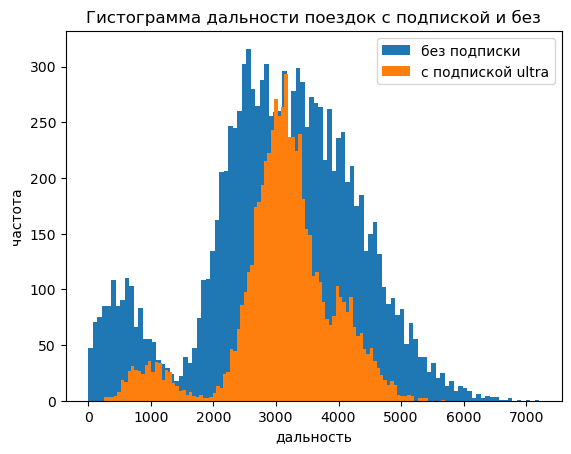

In [34]:
plt.hist(data_general_without_subs['distance'], label = 'без подписки', bins=100)
plt.hist(data_general_with_subs['distance'], label = 'с подпиской ultra', bins=100)
plt.title('Гистограмма дальности поездок с подпиской и без')
plt.xlabel('дальность')
plt.ylabel('частота')
plt.legend()
plt.show()

Видим похожие распределения с присущими похожими аномалиями слева, вцелом распределение близкое к нормальному.  
Без подписки - среднее значение дальности 3045, медиана 3114, первый квартиль 2366, третий квартиль 3905.  
С подпиской - среднее значение дальности 3115, медиана 3148, первый квартиль 2785, третий квартиль 3560. 
  
Значения с подпиской больше, но разница не значительна.

In [35]:
print(data_general_without_subs['duration'].describe())
print()
print(data_general_with_subs['duration'].describe())

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64


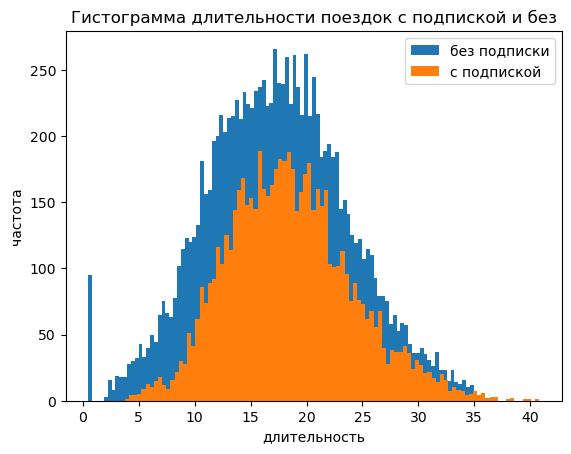

In [36]:
plt.hist(data_general_without_subs['duration'], label = 'без подписки', bins=100)
plt.hist(data_general_with_subs['duration'], label = 'c подпиской', bins=100)
plt.legend()
plt.title('Гистограмма длительности поездок с подпиской и без')
plt.xlabel('длительность')
plt.ylabel('частота')
plt.show()

Видим похожие распределения, графики с нормальными распределениями. 
Без подписки - среднее значение длительности 17, медиана 17, первый квартиль 13, третий квартиль 22.  
С подпиской - среднее значение длительности 19, медиана 18, первый квартиль 15, третий квартиль 22. 
  
Значения с подпиской больше, но разница не значительна.

#### Шаг 5. Подсчёт выручки

In [37]:
data_general

,user_id,distance,duration,date,date_month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04,11,Альберт,25,Краснодар,free,8,50,0
18064,1534,2840.423057,21.409799,2021-11-16,11,Альберт,25,Краснодар,free,8,50,0
18065,1534,3826.185507,18.435051,2021-11-18,11,Альберт,25,Краснодар,free,8,50,0
18066,1534,2902.308661,16.674362,2021-11-27,11,Альберт,25,Краснодар,free,8,50,0


In [38]:
data_general['duration'] = np.ceil(data_general['duration'])
data_general

,user_id,distance,duration,date,date_month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,26.0,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,16.0,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,7.0,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,19.0,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,27.0,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,3781.098080,20.0,2021-11-04,11,Альберт,25,Краснодар,free,8,50,0
18064,1534,2840.423057,22.0,2021-11-16,11,Альберт,25,Краснодар,free,8,50,0
18065,1534,3826.185507,19.0,2021-11-18,11,Альберт,25,Краснодар,free,8,50,0
18066,1534,2902.308661,17.0,2021-11-27,11,Альберт,25,Краснодар,free,8,50,0


In [39]:
gendata_agg = data_general.pivot_table(
    index=['user_id', 'date_month'], 
    values=['distance', 'duration', 'date', 'subscription_type', 'minute_price', 'start_ride_price', 'subscription_fee'], 
    aggfunc={'distance' : 'sum', 'duration' : 'sum', 'date' : 'count', 'subscription_type' : 'first', \
            'minute_price' : 'first', 'start_ride_price' : 'first','subscription_fee' : 'first',}
                                            ).reset_index(). rename(columns={'date' : 'number_of_trips',
                                                               'distance' : 'full_distance',
                                                               'duration' : 'full_duration'})
gendata_agg

,user_id,date_month,number_of_trips,full_distance,full_duration,minute_price,start_ride_price,subscription_fee,subscription_type
0,1,1,2,7027.511294,42.0,6,0,199,ultra
1,1,4,1,754.159807,7.0,6,0,199,ultra
2,1,8,2,6723.470560,46.0,6,0,199,ultra
3,1,10,2,5809.911100,32.0,6,0,199,ultra
4,1,11,3,7003.499363,56.0,6,0,199,ultra
...,...,...,...,...,...,...,...,...,...
11326,1534,6,2,3409.468534,26.0,8,50,0,free
11327,1534,8,2,7622.453034,48.0,8,50,0,free
11328,1534,9,1,4928.173852,23.0,8,50,0,free
11329,1534,11,4,13350.015305,78.0,8,50,0,free


Создал сводную тублицу, на основании общей таблицы, с общим количеством поездок по каждому пользователю, суммарным расстоянием и времени поездок

In [40]:
def total_monthprice(data):
    duration = data['full_duration']
    min = data['minute_price']
    number = data['number_of_trips']
    start = data['start_ride_price']
    sub_fee = data['subscription_fee']
    total_monthprice = sub_fee + start * number + min * duration
    return total_monthprice
    

In [41]:
gendata_agg['total_monthprice'] = gendata_agg.apply(total_monthprice, axis=1)

In [42]:
gendata_agg

,user_id,date_month,number_of_trips,full_distance,full_duration,minute_price,start_ride_price,subscription_fee,subscription_type,total_monthprice
0,1,1,2,7027.511294,42.0,6,0,199,ultra,451.0
1,1,4,1,754.159807,7.0,6,0,199,ultra,241.0
2,1,8,2,6723.470560,46.0,6,0,199,ultra,475.0
3,1,10,2,5809.911100,32.0,6,0,199,ultra,391.0
4,1,11,3,7003.499363,56.0,6,0,199,ultra,535.0
...,...,...,...,...,...,...,...,...,...,...
11326,1534,6,2,3409.468534,26.0,8,50,0,free,308.0
11327,1534,8,2,7622.453034,48.0,8,50,0,free,484.0
11328,1534,9,1,4928.173852,23.0,8,50,0,free,234.0
11329,1534,11,4,13350.015305,78.0,8,50,0,free,824.0


In [43]:
number_of_users_withsubs = gendata_agg.query('subscription_type=="ultra"')['total_monthprice'].count()
number_of_users_withoutsubs = gendata_agg.query('subscription_type!="ultra"')['total_monthprice'].count()
total_revenue_withsubs = gendata_agg.query('subscription_type=="ultra"')['total_monthprice'].sum()
total_revenue_withoutsubs = gendata_agg.query('subscription_type!="ultra"')['total_monthprice'].sum()
mean_ratio_withsubs = np.ceil(total_revenue_withsubs / number_of_users_withsubs)
mean_ratio_withoutsubs = np.ceil(total_revenue_withoutsubs / number_of_users_withoutsubs)

print(f'Общая выручка от пользователей с подпиской {total_revenue_withsubs}, \
средняя выручка с человека {mean_ratio_withsubs}')
print()
print(f'Общая выручка от пользователей без подписки {total_revenue_withoutsubs}, \
средняя выручка с человека {mean_ratio_withoutsubs}')

Общая выручка от пользователей с подпиской 1644537.0, средняя выручка с человека 363.0

Общая выручка от пользователей без подписки 2234104.0, средняя выручка с человека 329.0


**Средне месячная выручка от пользователей с подпиской составляет 363 , без подписки 329.  
Пользователи с подпиской приносят больше прибыли сервису**

#### Шаг 6. Проверка гипотез

##### Проверяю гипотезу о том, тратят ли пользователи с подпиской больше времени на поездки?  
##### Нулевая гипотеза: средняя продолжительность поездок пользователей с подпиской равна средней продолжительности поездки пользователей без подписки  
##### Альтернативная гипотеза: средняя продолжительность поездок пользователей с подпиской больше средней продолжительности поездки пользователей без подписки  

In [44]:
duration_with_subs = data_general.query('subscription_type == "ultra"')['duration']
duration_without_subs = data_general.query('subscription_type != "ultra"')['duration']

In [45]:
# задаю уровень статистической значимости alpha
alpha = 0.05 
# equal_var указал как False, так как размеры выборок с подпиской и без различны в два раза
# и судя по гистограммам дисперсии отличны
results = st.ttest_ind(duration_with_subs, duration_without_subs, equal_var=False, alternative='greater')

print('p-значение', results.pvalue)

if results.pvalue < alpha:
    print('отвергаем нулевую гипотезу (о том, что пользователи с подпиской и без тратят одинаковое время на поездки),',
         '\nесть основания полагать, что пользователи с подпиской тратят больше времени на поездки с уровнем',
         '\n статистической значимости в 0.05')
else:
    print('не получилось отвергнуть нулевую гипотезу',
          '(нет оснований полагать, что пользователи с подпиской и без тратят одинаковое время на поездки)')


p-значение 1.1814679253701353e-36
отвергаем нулевую гипотезу (о том, что пользователи с подпиской и без тратят одинаковое время на поездки), 
есть основания полагать, что пользователи с подпиской тратят больше времени на поездки с уровнем 
 статистической значимости в 0.05


Провел статистический ttest о том, что пользователи с подпиской тратят больше времени на поездки.  
Результаты теста с уровнем статистической значимости в 0.05 показали, что пользователи с подпиской тратят больше времени на поездки

##### Проверяю гипотезу о том,  что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?  
##### Нулевая гипотеза: средняя длительность поездки пользователей с подпиской равна 3130 м  
##### Альтернативная гипотеза: средняя продолжительность поездок пользователей с подпиской более 3130 м

In [46]:
distance_with_subs = data_general.query('subscription_type == "ultra"')['distance']

In [47]:
# задаю уровень статистической значимости alpha
alpha = 0.05 

nominal_dist = 3130

results_1 = st.ttest_1samp( 
    distance_with_subs,
    nominal_dist,
    alternative='greater'
)
print('p-значение', results_1.pvalue)

if results_1.pvalue < alpha:
    print('Отвергаем нулевую гипотезу (среднее расстояние с подпиской равно nominal_dist,',
         '\nесть основания полагать, что среднее расстояние более nominal_dist')
else:
    print('Не получилось отвергнуть нулевую гипотезу, ',
         '\nнет оснований полагать, что среднее расстояние не более nominal_dist')

p-значение 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу,  
нет оснований полагать, что среднее расстояние не более nominal_dist


Провел статистический ttest о том, что среднее расстояние с подпиской с уровнем статистической значимости в 0.05 равно или менее 3130 м, что является номинальным расстоянием за одну поездку с точки зрения износа самоката.  
Для сервиса это хороший показатель, так как издержки на обслуживание самокатов при не превышении номинальных дальностей поездок будут меньше

In [48]:
monthprice_with_subs = gendata_agg.query('subscription_type == "ultra"')['total_monthprice']
monthprice_without_subs = gendata_agg.query('subscription_type != "ultra"')['total_monthprice']

In [49]:
# задаю уровень статистической значимости alpha
alpha = 0.05 
# equal_var указал как False, так как размеры выборок с подпиской и без различны в два раза
# и судя по гистограммам дисперсии отличны
results = st.ttest_ind(monthprice_with_subs, monthprice_without_subs, equal_var=False, alternative='greater')

print('p-значение', results.pvalue)

if results.pvalue < alpha:
    print('отвергаем нулевую гипотезу (о том, что пользователи с подпиской и без в месяц тратят на поездки одинаково),',
         '\nесть основания полагать, что пользователи с подпиской в месяц тратят больше на поездки')
else:
    print('не получилось отвергнуть нулевую гипотезу')


p-значение 8.874140893976874e-40
отвергаем нулевую гипотезу (о том, что пользователи с подпиской и без в месяц тратят на поездки одинаково), 
есть основания полагать, что пользователи с подпиской в месяц тратят больше на поездки


Выручка сервиса от пользователей с подпиской выше, чем от пользователей без подписки

#### Шаг 7. Распределения

#### Задача 1  
Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж.  
Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10 % пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5 %.  
Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

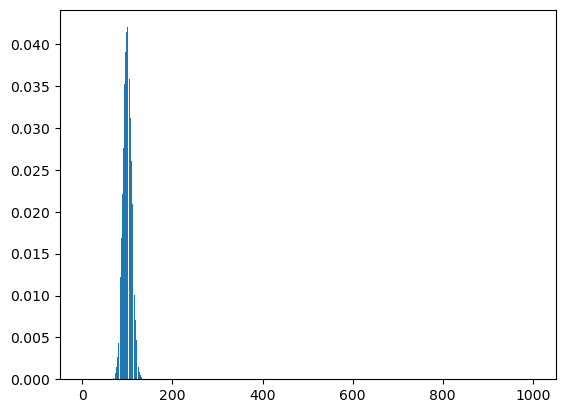

In [50]:
# Для такой задачи выбираю биномиальное распределение
# т.к. у биномиального распеределения есть только два исхода
# в  нашем случае или продлили подписку или нет

n = 1000
p = 0.1

distr = []

for k in range(0, n+1):
    choose = factorial(n) / (factorial(k) * factorial(n-k))
    freq = choose * p**k * (1-p)**(n-k)
    distr.append(freq)
    
plt.bar(range(0, n+1), distr);


Построил график распределения удачных исходов (продления подписки) при раздаче бесплатных подписок 1000 человек, при n = 1000 наиболее вероятное количество удачных исходов = 100

In [51]:
n = 1000
p = 0.1
# далее считаю математическое ожидание и стандартное отклонение 
mu = n * p 
sigma = sqrt(n * p * (1-p))

distr = st.norm(mu, sigma)
aint = 100

result = 1 - distr.cdf(aint)
result

0.5

Получили, что с вероятностью в 50% мы сможем выполнить план, изменим количество n так, чтобы вероятность была близка к 95%

In [52]:
n = 1170
p = 0.1

mu = n * p 
sigma = sqrt(n * p * (1-p))

distr = st.norm(mu, sigma)
aint = 100

result = 1 - distr.cdf(aint)
result

0.9512064034722397

Получили нужный ответ, при 1170 раз использования промокодов на бесплатный месяц подписки, вероятность того, что менее 100 клиентов продляч подписку платно является около 5%

#### Задача 2  
Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении.  
Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов.
Отдел планирует разослать 1 млн уведомлений. 
С помощью аппроксимации постройте примерный график распределения
и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

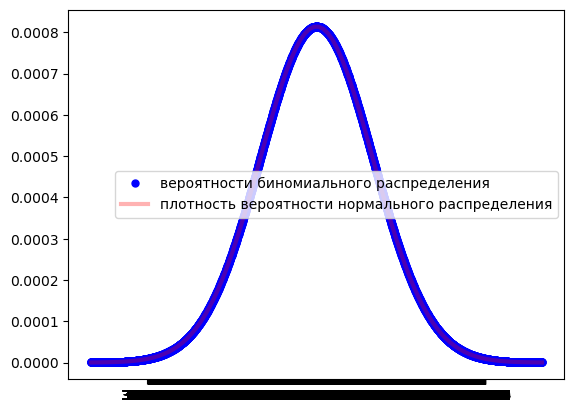

In [53]:
# Для такой задачи выбираю биномиальное распределение
# т.к. у биномиального распеределения есть только два исхода
# в  нашем случае или уведомление или нет



 
# зададим функцию, которая выдаёт <num> чисел,
# равномерно распределённых от <start> до <stop>
# (понадобится для визуализации нормального распределения)
def linspace(start, stop, num):
    step = (stop - start) / (num - 1)
    result = []
    for i in range(num):
        result.append(start + step * i)
    return result
 
# задаём параметры биномиального распределения
n = 10**6
p = 0.4

# границы промежутка, в котором будем строить аппроксимацию -
# от n*p минус 4 ст.отклонения бином.распределения
# до n*p плюс 4 ст.отклонения бином.распределения
# (там, где вероятности значений почти не равны нулю)
left = int(n * p - 4 * sqrt(n * p * (1 - p)))
right = int(n * p + 4 * sqrt(n * p * (1 - p)))
 
# зададим набор значений биномиальной величины на выбранном промежутке:
# все неотрицательные целые числа от left до right
x = list(range(max(0, left), right))
# рисуем график биномиального распределения
ax = plt.subplot()
# используем синие о-образные маркеры и размер маркера 5
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=5,
	      label='вероятности биномиального распределения')

# зададим мат.ожидание и ст.отклонение нормального распределения равными
# мат.ожиданию и ст.отклонению биномиального распределения
mu = n * p
sigma = sqrt(n * p * (1 - p))
 
# рисуем график нормального распределения:
# получим список из 100 чисел от left до right
x = linspace(left, right, 100)
# используем красную линию ширины 3 и прозрачности 0.3
ax.plot(x, norm.pdf(x, mu, sigma), 'r-', lw=3, alpha=0.3, label='плотность вероятности нормального распределения')
 
# зададим подписи по оси x в пределах ± 3 ст.отклонений от мат.ожидания
# (последний аргумент в методе range - интервал между подписями)
x_ticks = list(range(int(mu - 3 * sigma), int(mu + 3 * sigma), 1))
ax.set_xticks(x_ticks)

# настраиваем оптимальное расположение легенды и выводим график
ax.legend(loc='best')
plt.show()



**На самом деле не полностью разобрался в этом вопросе,НО нашел в теории разбор такойже задачи и подставил в код из теории данные нашей задачи, чтобы построить распределение**

In [54]:
n = 10**6
p = 0.4

mu = n * p 
sigma = sqrt(n * p * (1-p))

distr = st.norm(mu, sigma)
aint = 399.5 * 10**3

result = distr.cdf(aint)
result

0.15371708296369768

С помощью метода .cdf оценил вероятность того, что удачных исходов (откроют уведомление) биномиального эксперимента будет не более 399.5 тыс. раз. Вероятность составляет около 15 процентов 

# Общий вывод  
Провел аналитику выборок данных с информацией о пользователях, о поездках и о наличии подписок популярного сервиса аренды самокатов GoFast.  
* Посмотрел общую информацию о хранящихся данных в нескольких наборах данных, проверил наличие пропусков и явных дубликатов в данных.  
* Выполнил предобработку данных, столбец с информациией о дате размещения обявления перевел в формат дат и добавил столбец с номером месяца.  
* Исследовал пропуски в данных - пропуски в столбце с информацией о балконах были заменены на 0.  
* Построил гистограммы по основным характеристикам (информацию о городе, о наличии полписки, возрасте пользователей, расстоянии и продолжительности поездок).
* В исследуемых данных больше всего пользователей было из Пятигорска - 219, меньше всего из Москвы - 168, вцелом данные количества пользователей по городам различаются не сильно. Количество пользователей с платной подпиской на сервис и без отличается тоже не координально, но разница естьЮ без подписки 835 (54.4 %) пользователей, с подпиской 699 (45.6 %) пользователей. 
* Сравнил длительность и дальность поездок пользователей с подпиской и без нее, в данных получились похожие распределения близкие к нормальным распределениям, значения с подпиской практически по всем наблюденим выше, но не значительно, до 10 %.


* Добавил столбец с данными о выручке по каждому пользователю. 
* Провел статистические ttest о влиянии подписки на сервис на длительность, дальность поездок, а также на выручку компании от пользователя с подпиской или без.

### Резюмируя, хочу подчеркнуть, что для компании пользователи с подпиской значительно более выгодны и ценны:
#### - !пользователи с подпиской надежнее "привязаны к сервису" и будут давть более стабильный и длительный доход для компании
#### - пользователи с подпиской приносят бОльшую средне месячную выручку сервису
#### - чаще всего они не превышают номинально комфортную длительность поездки для самоката


